In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("usd6.csv")

In [0]:
df["rate"] = df["rate_100"] / 100

In [0]:
money = df["rate"]

In [0]:
past = 7 * 4  ## take rates from last 4 weeks
future = 7  ## trying to predict the rate for next week

In [12]:
money.head(50)

0     7.9850
1     7.9850
2     7.9850
3     7.9850
4     7.9850
5     7.9850
6     7.9850
7     7.9850
8     7.9850
9     7.9850
10    7.9850
11    7.9905
12    7.9984
13    8.0040
14    8.0024
15    8.0024
16    8.0024
17    8.0012
18    8.0012
19    8.0055
20    8.0055
21    8.0100
22    8.0100
23    8.0100
24    8.0084
25    8.0080
26    8.0048
27    8.0024
28    8.0012
29    8.0012
30    8.0012
31    7.9990
32    7.9993
33    8.0004
34    8.0012
35    8.0012
36    8.0012
37    8.0012
38    8.0004
39    8.0074
40    8.0093
41    8.0100
42    8.0100
43    8.0100
44    8.0100
45    8.0025
46    8.0020
47    8.0024
48    8.0024
49    7.9997
Name: rate, dtype: float64

In [0]:
start = 28
end = len(money) - future

In [0]:
raw_df = []
for i in range(start,end):
    past_and_future_values = money[(i-past):(i+future)]
    raw_df.append(list(past_and_future_values))

In [0]:
past_columns = []
for i in range(past):
    past_columns.append("past_{}".format(i))

In [0]:
future_columns = []
for i in range(future):
    future_columns.append("future_{}".format(i))

In [0]:
df = pd.DataFrame(raw_df, columns=(past_columns+future_columns))

In [0]:
## Training dataset

X = df[past_columns][:-100]  ## input
Y = df[future_columns][:-100]  ## what we are trying to predict

In [0]:
## Test dataset

X_test = df[past_columns][-100:]  ## exercises
Y_test = df[future_columns][-100:]  ## answers

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
LinReg = LinearRegression()  ## create a model

In [22]:
LinReg.fit(X,Y)  ## teaching the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
prediction = LinReg.predict(X_test)

In [24]:
prediction[99]

array([23.8792959 , 23.91018476, 23.91139311, 23.91625585, 23.917858  ,
       23.94073139, 23.95028135])

In [25]:
Y_test[-1:]

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
3591,23.724789,23.688511,23.689203,23.603546,23.563276,23.563276,23.563276


In [0]:
import matplotlib.pyplot as plt

In [0]:
def plotChart(prediction):
    plt.plot(prediction[99], label="prediction")
    plt.plot(Y_test[-1:].iloc[0], label="real")
    plt.legend()

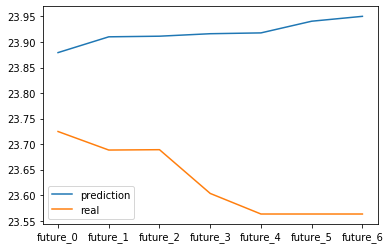

In [28]:
plotChart(prediction)

In [0]:
from sklearn.metrics import mean_absolute_error

In [30]:
mean_absolute_error(Y_test[-1:].iloc[0], prediction[99])

0.2900176221492638

In [0]:
def printError(prediction):
    errors_list = []
    for i in range(len(prediction)):
        error = mean_absolute_error(Y_test.iloc[i], prediction[i])
        errors_list.append(error)
    avr_err = sum(errors_list) / len(prediction)
    max_err = max(errors_list)
    print("average error = {}".format(avr_err))
    print("max error = {}".format(max_err))

In [32]:
printError(prediction)

average error = 0.1854779828724235
max error = 0.5670665877923555


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
MLP = MLPRegressor()

In [35]:
MLP.fit(X,Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
predictionMLP = MLP.predict(X_test)

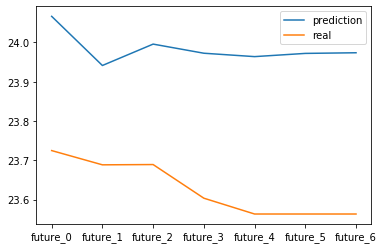

In [37]:
plotChart(predictionMLP)

In [38]:
printError(predictionMLP)

average error = 0.2380503331478319
max error = 0.5741475510771055


In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
KNN = KNeighborsRegressor(n_neighbors=25)

In [41]:
KNN.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')

In [0]:
predictionKNN = KNN.predict(X_test)

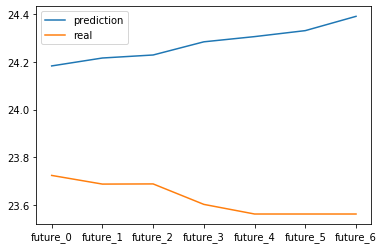

In [43]:
plotChart(predictionKNN)

In [44]:
printError(predictionKNN)

average error = 0.4151634099428577
max error = 1.206891171428578


In [0]:
## trying to auto optimize model

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
import numpy as np

In [0]:
MLP = MLPRegressor()

In [49]:
MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
GS = GridSearchCV(MLP, {
    "activation": ["logistic", "tanh"],
    "max_iter": np.linspace(100, 1000, 4, dtype=np.int16),
    "hidden_layer_sizes": [(50,50), (100,100), (50,50,50)]
}, cv=3, scoring="neg_mean_squared_error")

In [58]:
GS.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_stat...ne, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'tanh'],
                  

In [59]:
GS.best_estimator_

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [60]:
GS.best_score_

-5.710778732999603

In [0]:
BestMLP = GS.best_estimator_

In [0]:
predictionBestMLP = BestMLP.predict(X_test)

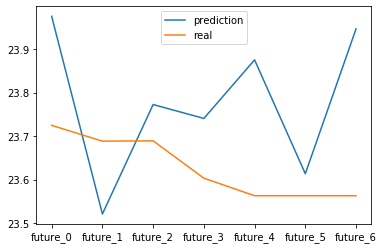

In [66]:
plotChart(predictionBestMLP)

In [67]:
printError(predictionBestMLP)

average error = 0.30490123942500563
max error = 1.0252979664552535
